In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [2]:
class Net_Xavier(nn.Module):
    def __init__(self, layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()
        
        for input_size, output_size in zip(layers, layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)
        
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L-1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        
        return x

In [3]:
class Net_Uniform(nn.Module):
    def __init__(self, layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()
        
        for input_size, output_size in zip(layers, layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
        
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L-1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        
        return x

In [4]:
class Net(nn.Module):
    
    def __init__(self, layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(layers, layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)
    
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
                
        return x

In [5]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss': [], 'validation_accuracy': []}
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            
            yhat = model(x.view(-1, 28*28))
            
            loss = criterion(yhat, y)
            
            loss.backward()
            optimizer.step()
            
            loss_accuracy['training_loss'].append(loss.data.item())
            
            
        correct = 0
        
        
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28*28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
            
            
        accuracy = 100 * (correct/len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)
        
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss:.4f} - Accuracy:{accuracy:.2f}%")
        
        
            
    return loss_accuracy

In [6]:
train_dataset = dsets.MNIST(root = './data', train = True, transform = transforms.ToTensor())

In [7]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [9]:
criterion = nn.CrossEntropyLoss()

In [10]:
input_dim = 28*28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, output_dim]
epochs = 15
learning_rate = 0.01

In [11]:
model = Net(layers)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

model_xavier = Net_Xavier(layers)
optimizer_xavier = torch.optim.SGD(model_xavier.parameters(), lr = learning_rate)

model_uniform = Net_Uniform(layers)
optimizer_uniform = torch.optim.SGD(model_uniform.parameters(), lr = learning_rate)

In [12]:
loss_accuracy = train(model, criterion, train_loader, validation_loader, optimizer, epochs)
                      
loss_accuracy_xavier = train(model_xavier, criterion, train_loader, validation_loader, optimizer_xavier, epochs)
                      
loss_accuracy_uniform = train(model_uniform, criterion, train_loader, validation_loader, optimizer_uniform, epochs)

Epoch [1/15] - Loss: 2.3255 - Accuracy:10.55%
Epoch [2/15] - Loss: 2.3206 - Accuracy:13.07%
Epoch [3/15] - Loss: 2.3041 - Accuracy:15.88%
Epoch [4/15] - Loss: 2.3035 - Accuracy:14.99%
Epoch [5/15] - Loss: 2.2931 - Accuracy:15.02%
Epoch [6/15] - Loss: 2.2865 - Accuracy:16.58%
Epoch [7/15] - Loss: 2.2788 - Accuracy:18.97%
Epoch [8/15] - Loss: 2.2673 - Accuracy:21.39%
Epoch [9/15] - Loss: 2.2593 - Accuracy:27.50%
Epoch [10/15] - Loss: 2.2390 - Accuracy:33.69%
Epoch [11/15] - Loss: 2.2251 - Accuracy:34.61%
Epoch [12/15] - Loss: 2.2051 - Accuracy:34.46%
Epoch [13/15] - Loss: 2.1783 - Accuracy:33.52%
Epoch [14/15] - Loss: 2.1499 - Accuracy:32.68%
Epoch [15/15] - Loss: 2.1340 - Accuracy:31.75%
Epoch [1/15] - Loss: 2.2605 - Accuracy:19.13%
Epoch [2/15] - Loss: 2.1466 - Accuracy:27.49%
Epoch [3/15] - Loss: 2.0414 - Accuracy:36.82%
Epoch [4/15] - Loss: 1.9233 - Accuracy:44.33%
Epoch [5/15] - Loss: 1.8329 - Accuracy:49.09%
Epoch [6/15] - Loss: 1.7662 - Accuracy:51.87%
Epoch [7/15] - Loss: 1.6861 

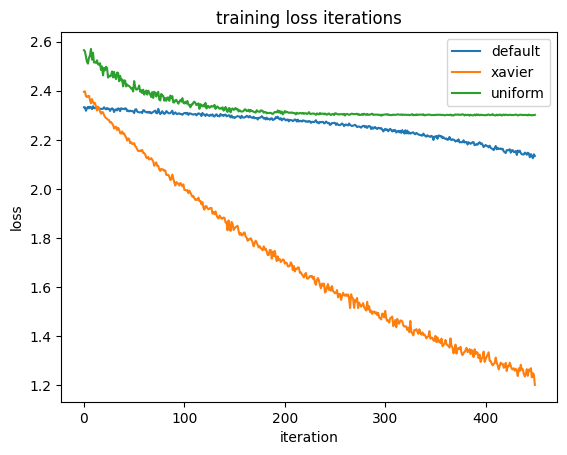

In [13]:
plt.plot(loss_accuracy['training_loss'], label = 'default')
plt.plot(loss_accuracy_xavier['training_loss'], label = 'xavier')
plt.plot(loss_accuracy_uniform['training_loss'], label = 'uniform')
plt.xlabel('iteration')
plt.ylabel('loss') 
plt.title('training loss iterations')
plt.legend()

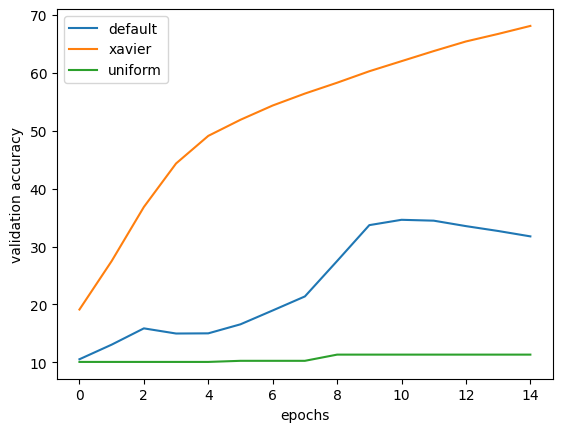

In [14]:
plt.plot(loss_accuracy['validation_accuracy'], label = 'default')
plt.plot(loss_accuracy_xavier['validation_accuracy'], label = 'xavier')
plt.plot(loss_accuracy_uniform['validation_accuracy'], label = 'uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs')   
plt.legend()